# Data analysis

### 1) Load datasets from BIN file

In [1]:
import pickle
with open('aida.bin', 'rb') as outfile:
    aida_articles=pickle.load(outfile)
with open('wes2015.bin', 'rb') as outfile:
    wes_articles=pickle.load(outfile)
    
wes_title='wes2015'
aida_title='aida'

### 2) Distribution of AIDA collections 

In [2]:
from collections import defaultdict

d=defaultdict(int)
for article in aida_articles:
    d[article.collection]+=1
d

defaultdict(int, {'aidatesta': 216, 'aidatestb': 231, 'aidatrain': 946})

### 3) Get frequency distributions of forms and instances

In [65]:
all_articles=aida_articles.union(wes_articles)

In [66]:
import time
import plot_utils

t1=time.time()
#print(example_article.identifier)
wes_cnt_instances, wes_cnt_forms=plot_utils.get_mention_counts(wes_articles)
aida_cnt_instances, aida_cnt_forms=plot_utils.get_mention_counts(aida_articles)
all_cnt_instances, all_cnt_forms=plot_utils.get_mention_counts(all_articles)
aida_cnt_instances.pop('--NME--', None)
t2=time.time()


### 4) Plot frequency distribution of FORMS

<span style="background-color:lightgreen">Section 5.1. of the paper</span>

**4.1. Linear plots **

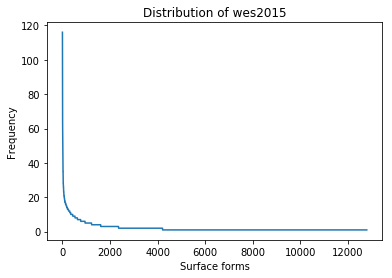

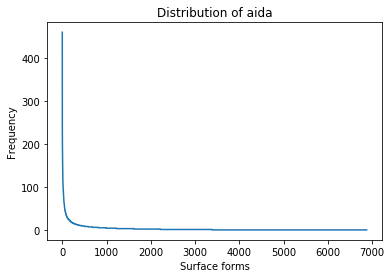

In [4]:
plot_utils.plot_freq_dist(wes_cnt_forms, wes_title, x_axis='Surface forms')
plot_utils.plot_freq_dist(aida_cnt_forms, aida_title, x_axis='Surface forms')

**4.2. Log-log plots**

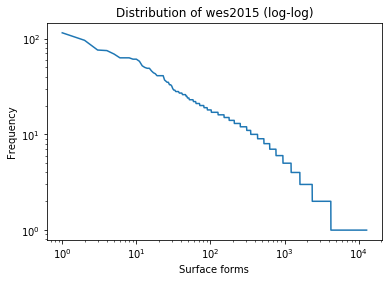

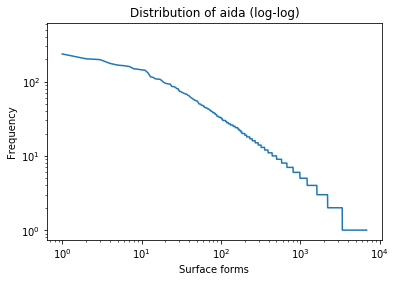

In [5]:
plot_utils.plot_freq_dist(wes_cnt_forms, wes_title, x_axis='Surface forms', loglog=True, b=10)
plot_utils.plot_freq_dist(aida_cnt_forms, aida_title, x_axis='Surface forms', loglog=True, b=10)

**4.3. Slope** 

In [6]:
import plot_utils
aida_slope=plot_utils.calculate_slope(aida_cnt_forms)
wes_slope=plot_utils.calculate_slope(wes_cnt_forms)
print(aida_slope)
print(wes_slope)

LinregressResult(slope=-0.0022036164183156324, intercept=11.620965629475819, rvalue=-0.37260300743819236, pvalue=1.8815464484624348e-225, stderr=6.6190701161751247e-05)
LinregressResult(slope=-0.00049347163012393794, intercept=5.3903221820524916, rvalue=-0.46468730737613617, pvalue=0.0, stderr=8.3165696362870735e-06)


### 5) Plot frequency distribution of INSTANCES

<span style="background-color:lightgreen">Section 5.1. of the paper</span>

**5.1. Linear plots **

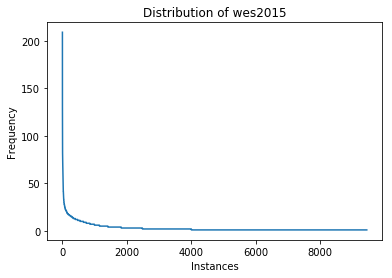

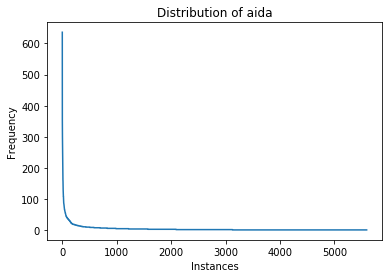

In [7]:
plot_utils.plot_freq_dist(wes_cnt_instances, wes_title, x_axis='Instances')
plot_utils.plot_freq_dist(aida_cnt_instances, aida_title, x_axis='Instances')

**5.2. Log-log plots**

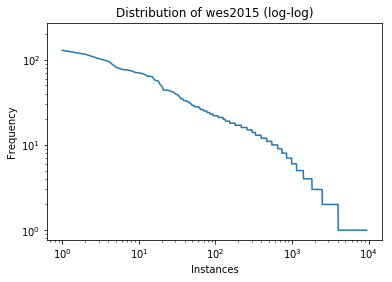

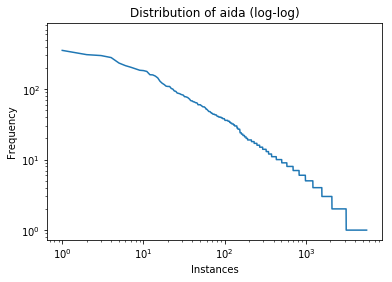

In [8]:
plot_utils.plot_freq_dist(wes_cnt_instances, wes_title, x_axis='Instances', loglog=True, b=10)
plot_utils.plot_freq_dist(aida_cnt_instances, aida_title, x_axis='Instances', loglog=True, b=10)

**5.3. Slope** 

In [9]:
import plot_utils
aida_slope=plot_utils.calculate_slope(aida_cnt_instances)
wes_slope=plot_utils.calculate_slope(wes_cnt_instances)
print(aida_slope)
print(wes_slope)

LinregressResult(slope=-0.0034990210669294578, intercept=14.75680125464558, rvalue=-0.3382295714741132, pvalue=1.0049300262640952e-149, stderr=0.00013019947269153514)
LinregressResult(slope=-0.00105588227994161, intercept=8.0121420692953293, rvalue=-0.49799538354507872, pvalue=0.0, stderr=1.8923012612086585e-05)


### 6) PageRank distribution of instances


#### 6.1. Obtain pagerank data

In [10]:
skip_zeros=True

wes_pageranks, wes_pr_uniq=plot_utils.get_pagerank_distribution(wes_articles, skip_zeros=skip_zeros)

aida_pageranks, aida_pr_uniq=plot_utils.get_pagerank_distribution(aida_articles, skip_zeros=skip_zeros)

#### 6.2. Plot the PR distribution

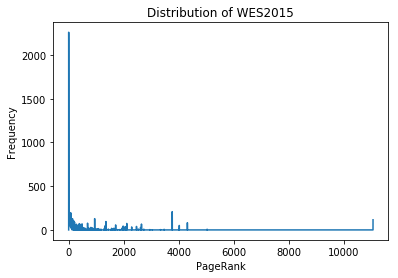

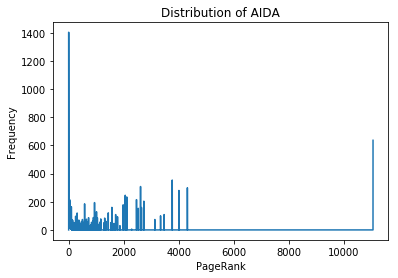

In [11]:
plot_utils.plot_freq_noagg(wes_pageranks, title='WES2015', x_axis='PageRank')
plot_utils.plot_freq_noagg(aida_pageranks, title='AIDA', x_axis='PageRank')

#### 6.3. Plot the PR distribution (unique instances)

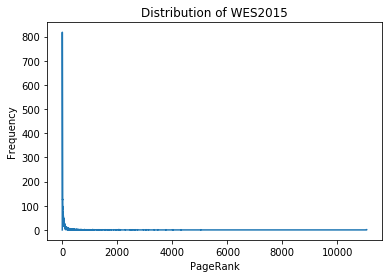

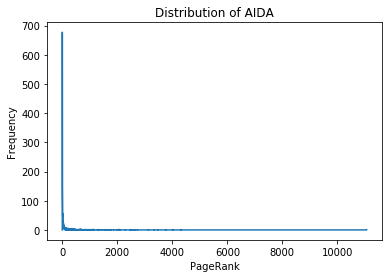

In [12]:
plot_utils.plot_freq_noagg(wes_pr_uniq, title='WES2015', x_axis='PageRank')
plot_utils.plot_freq_noagg(aida_pr_uniq, title='AIDA', x_axis='PageRank')

#### 6.4. Inspect individual pagerank

In [13]:
# United_States has a max pageRank of 11066. 
pr=11066
print(wes_pageranks[pr], wes_pr_uniq[pr])


116 1


In [14]:
import redis
x=redis.Redis()
x.get('pr:United_States')

b'11066.2733'

# Note: from here onwards most plots given stats for both datasets jointly


### 7) Prepare ambiguity and variance data

In [58]:
interpretations, references = plot_utils.get_interpretations_and_references(all_articles, skip_nils=True)

### 8) Aggregation per ambiguity

<span style="background-color:lightgreen">Section 5.2. of the paper</span>

In [59]:
ambiguity={}
for form,meanings in interpretations.items():
    ambiguity[form]=len(meanings)
ambiguity

{'HELSINKI': 1,
 'explored': 1,
 'the South Pole': 1,
 'FRENCH': 2,
 'PARIS': 1,
 'French': 5,
 'Lens': 1,
 'Nantes': 1,
 'Paris St Germain': 1,
 'Nancy': 2,
 'NHL': 1,
 'NEW YORK': 4,
 'National Hockey League': 1,
 'NY RANGERS': 1,
 'Toronto': 3,
 'BUFFALO': 2,
 'Anaheim': 1,
 'Pittsburgh': 3,
 'WASHINGTON': 4,
 'Montreal': 3,
 'CHICAGO': 6,
 'Philadelphia': 4,
 'DALLAS': 4,
 'St Louis': 2,
 'COLORADO': 2,
 'EDMONTON': 2,
 'Ottawa': 2,
 'NORTHERN IRELAND': 2,
 'LONDON': 1,
 'Northern Ireland': 2,
 'Ards': 1,
 'Crusaders': 2,
 'Cliftonville': 1,
 'Portadown': 1,
 'Glenavon': 1,
 'Linfield': 1,
 'Glentoran': 1,
 'Coleraine': 1,
 'March 27': 1,
 '1871': 2,
 'German': 4,
 'novelist': 1,
 'Heinrich Mann': 1,
 'Nobel laureate': 1,
 'Thomas Mann': 2,
 'criticisms': 1,
 'fascism': 1,
 'life': 2,
 'Nazis': 2,
 '1933': 1,
 'book': 1,
 'Professor Unrat': 1,
 'movie': 2,
 'Der Blaue Engel': 1,
 'Marlene Dietrich': 1,
 'role': 2,
 'Lübeck': 1,
 'child': 1,
 'Júlia da Silva Bruhns': 1,
 'bourgeois'

In [60]:
agg_per_ambiguity=defaultdict(int)
for form, amb in ambiguity.items():
    agg_per_ambiguity[amb]+=1

In [1]:
agg_per_ambiguity

NameError: name 'agg_per_ambiguity' is not defined

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(agg_per_ambiguity.keys()), list(agg_per_ambiguity.values()), 'ro')
plt.show()

In [ ]:
sum(i for j,i in agg_per_ambiguity.items() if j>1)

#### AIDA: This means that there are 622 (or 477 without NILs) out of ~11k forms that have some ambiguity in the data

### 9) Aggregation per variance

<span style="background-color:lightgreen">Section 5.3. of the paper</span>

In [62]:
variance={}
for meaning,forms in references.items():
    variance[meaning]=len(forms)
variance

{'Helsinki': 2,
 'Exploration': 6,
 'South_Pole': 2,
 'France': 7,
 'Paris': 6,
 'RC_Lens': 2,
 'FC_Nantes': 1,
 'Paris_Saint-Germain_F.C.': 4,
 'AS_Nancy': 1,
 'National_Hockey_League': 2,
 'New_York_City': 11,
 'New_York_Rangers': 1,
 'Toronto_Maple_Leafs': 2,
 'Buffalo_Sabres': 3,
 'Anaheim_Ducks': 2,
 'Pittsburgh_Penguins': 2,
 'Washington_Capitals': 1,
 'Montreal_Canadiens': 2,
 'Chicago_Blackhawks': 1,
 'Philadelphia_Flyers': 2,
 'Dallas_Stars': 1,
 'St._Louis_Blues': 2,
 'Colorado_Avalanche': 1,
 'Edmonton_Oilers': 1,
 'Ottawa_Senators': 2,
 'Northern_Ireland': 4,
 'London': 6,
 'Ards_F.C.': 1,
 'Crusaders_F.C.': 1,
 'Cliftonville_F.C.': 1,
 'Portadown_F.C.': 1,
 'Glenavon_F.C.': 1,
 'Linfield_F.C.': 1,
 'Glentoran_F.C.': 1,
 'Coleraine_F.C.': 1,
 'March_27': 1,
 '1871': 1,
 'Germany': 8,
 'Novel': 5,
 'Heinrich_Mann': 5,
 'List_of_Nobel_laureates': 2,
 'Thomas_Mann': 5,
 'Criticism': 3,
 'Fascism': 1,
 'Life': 4,
 'Nazism': 5,
 '1933': 1,
 'Book': 4,
 'Professor_Unrat': 1,
 'Fe

In [63]:
agg_per_variance=defaultdict(int)
for uri, v in variance.items():
    agg_per_variance[v]+=1

In [64]:
agg_per_variance

defaultdict(int,
            {1: 10924,
             2: 2530,
             3: 759,
             4: 278,
             5: 110,
             6: 50,
             7: 19,
             8: 17,
             9: 6,
             10: 1,
             11: 1,
             12: 6,
             14: 1,
             18: 1})

### 10) Correlation between frequency of forms and ambiguity

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

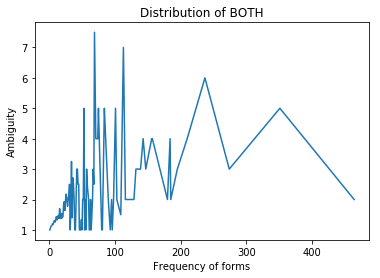

In [67]:
plot_utils.frequency_correlation(all_cnt_forms, ambiguity, title='BOTH', x_label='Frequency of forms', y_label='Ambiguity')

### 11) Correlation between frequency of instances and variance

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

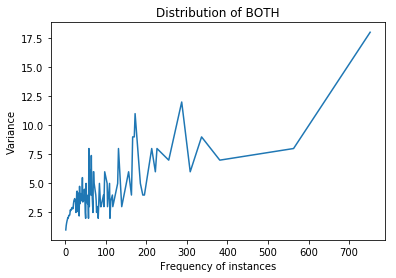

In [69]:
plot_utils.frequency_correlation(all_cnt_instances, variance, title='BOTH', x_label='Frequency of instances', y_label='Variance')

### 12) Correlation between PageRank and variance

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

In [72]:
all_pr_instances = {}
for article in all_articles:
    for mention in article.entity_mentions:
        if mention.gold_link!='--NME--' and (not skip_zeros or int(mention.gold_pr)>0):
            all_pr_instances[mention.gold_link]=int(mention.gold_pr)

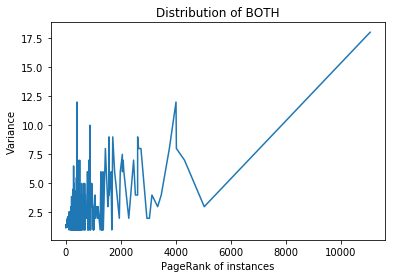

In [73]:
plot_utils.frequency_correlation(all_pr_instances, variance, title='BOTH', x_label='PageRank of instances', y_label='Variance')

### 13) Correlation between PageRank and frequency

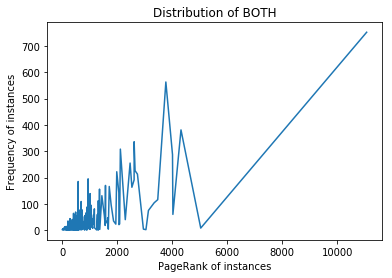

In [74]:
plot_utils.frequency_correlation(all_pr_instances, all_cnt_instances, title='BOTH', x_label='PageRank of instances', y_label='Frequency of instances')

### 14) Inspection of the distribution within the instances of a single form

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [75]:
form='World Cup' # this is the form with max ambiguity (of 12) in our dataset

insts=plot_utils.get_form_distribution(all_articles, form)

insts

[('1998_FIFA_World_Cup', 19),
 ('FIFA_World_Cup', 15),
 ('FIS_Alpine_Ski_World_Cup', 9),
 ('FIS_Freestyle_Skiing_World_Cup', 5),
 ('Cricket_World_Cup', 5),
 ('UCI_Road_World_Cup', 5),
 ('Biathlon_World_Cup', 3),
 ('1995_Rugby_World_Cup', 2),
 ('FIS_Ski_Jumping_World_Cup', 2),
 ('Rugby_World_Cup', 2),
 ('World_Cup_of_Hockey', 1),
 ('ISU_Speed_Skating_World_Cup', 1)]

### 15) Inspection of the distribution of PageRank within the instances of a single form

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [76]:
form='World Cup' # this is the form with max ambiguity
for instance in interpretations[form]:
    print(instance, '\t', all_pr_instances[instance])


FIS_Alpine_Ski_World_Cup 	 21
FIS_Ski_Jumping_World_Cup 	 9
1998_FIFA_World_Cup 	 59
Biathlon_World_Cup 	 5
UCI_Road_World_Cup 	 4
FIS_Freestyle_Skiing_World_Cup 	 3
Cricket_World_Cup 	 34
World_Cup_of_Hockey 	 6
ISU_Speed_Skating_World_Cup 	 3
FIFA_World_Cup 	 186
1995_Rugby_World_Cup 	 16
Rugby_World_Cup 	 52


### 16) Inspection of the frequency distribution within the forms of a single instance

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [77]:
instance='United_States' # this is both the instance with max variance and max frequency

refs=plot_utils.get_instance_distribution(all_articles, instance)

refs

[('U.S.', 462),
 ('United States', 128),
 ('American', 67),
 ('U.S', 27),
 ('America', 16),
 ('US', 11),
 ('USA', 10),
 ('Americans', 7),
 ('Washington', 7),
 ('the United States', 5),
 ('U.S.-based', 2),
 ("America's", 2),
 ('the US', 2),
 ('Unites States', 2),
 ('AMERICAN', 1),
 ('UNITED STATES', 1),
 ('US-American', 1),
 ('the USA', 1)]